### Loading CSV files into DataFrames:


In [1]:
import pandas as pd

# Load CSV files into DataFrames
df_ratings = pd.read_csv(r"C:\Users\mohd ashfaq\Downloads\movie_data\ratings.csv")
df_tags = pd.read_csv(r"C:\Users\mohd ashfaq\Downloads\movie_data\tags.csv")
df_links = pd.read_csv(r"C:\Users\mohd ashfaq\Downloads\movie_data\links.csv")
df_movies = pd.read_csv(r"C:\Users\mohd ashfaq\Downloads\movie_data\movies.csv")


In [16]:
df_movies.shape

(9742, 3)

In [17]:
df_ratings.shape

(100836, 4)

In [18]:
df_ratings.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [27]:
import pandas as pd

# Load ratings.csv into DataFrame
df_ratings = pd.read_csv(r"C:\Users\mohd ashfaq\Downloads\movie_data\ratings.csv")

# Count the number of ratings for each movie
ratings_count_per_movie = df_ratings['movieId'].value_counts()

# Find the movieId with the maximum number of ratings
max_ratings_movie_id = ratings_count_per_movie.idxmax()

# Display the movieId with the maximum number of user ratings
print(f"The movieId that received the maximum number of user ratings is: {max_ratings_movie_id}")


The movieId that received the maximum number of user ratings is: 356


In [30]:

# Filter ratings for movie ID 356
movie_356_ratings = df_movies[df_movies['movieId'] == 356]

# Display details of movie ID 356 ratings
movie_356_ratings


,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [32]:

# Find movieId for "Matrix, The (1999)"
movie_matrix_id = df_movies[df_movies['title'] == 'Matrix, The (1999)']['movieId'].iloc[0]

# Filter tags for the movie ID of "Matrix, The (1999)"
matrix_tags = df_tags[df_tags['movieId'] == movie_matrix_id]

matrix_tags


,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


In [34]:

# Find movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = df_movies[df_movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].iloc[0]

# Calculate the average user rating for "Terminator 2: Judgment Day (1991)"
avg_rating = df_ratings[df_ratings['movieId'] == terminator_movie_id]['rating'].mean()

avg_rating

3.970982142857143

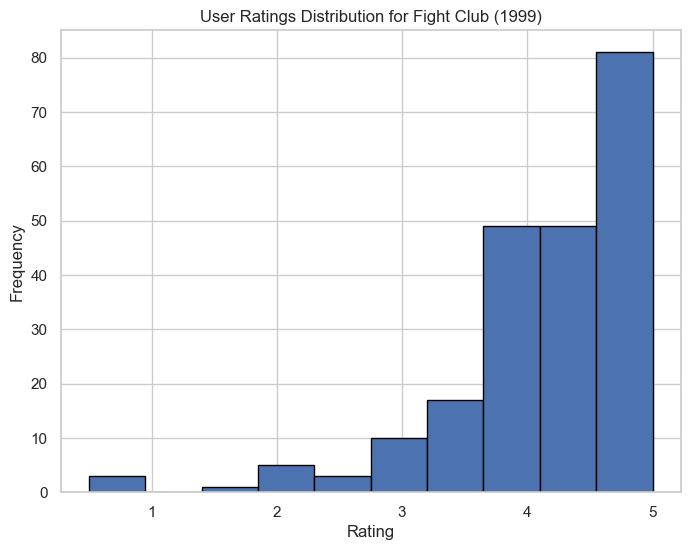

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load movies.csv and ratings.csv into DataFrames
df_movies = pd.read_csv(r"C:\Users\mohd ashfaq\Downloads\movie_data\movies.csv")
df_ratings = pd.read_csv(r"C:\Users\mohd ashfaq\Downloads\movie_data\ratings.csv")

# Find movieId for "Fight Club (1999)"
fight_club_movie_id = df_movies[df_movies['title'] == 'Fight Club (1999)']['movieId'].iloc[0]

# Filter ratings for "Fight Club (1999)"
fight_club_ratings = df_ratings[df_ratings['movieId'] == fight_club_movie_id]['rating']

# Create a histogram for user ratings of "Fight Club (1999)"
plt.figure(figsize=(8, 6))
plt.hist(fight_club_ratings, bins=10, edgecolor='black')
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Grouping the user ratings based on movieId and calculating count and mean ratings:

In [19]:
### Group the user ratings based on movieId and calculate count and mean ratings
grouped_ratings = df_ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()

# Rename columns for clarity
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']


### Merging movies.csv and grouped ratings using inner join:

In [20]:
# Merge movies.csv and grouped ratings using inner join
merged_inner = pd.merge(df_movies, grouped_ratings, on='movieId', how='inner')


### Filtering movies with more than 50 user ratings:

In [21]:
# Filter movies with more than 50 user ratings
filtered_movies = merged_inner[merged_inner['rating_count'] > 50]

# Display the resulting DataFrame
print(filtered_movies)


      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  rating_count  rating_mean  
0     Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                      Adventure|Children|Fantasy           110     3.431818  
2                                  Comedy|Romance            52     3.259615  
5                           Action|Crime|Thriller           102     3.9

In [22]:
filtered_movies

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


### most_popular_movie

In [23]:

# Sort movies by average user rating in descending order
most_popular_movie = filtered_movies.sort_values(by='rating_mean', ascending=False).head(1)

# Display the most popular movie based on average user rating
print("Most popular movie based on average user ratings:")
print(most_popular_movie[['title', 'rating_mean']])


Most popular movie based on average user ratings:
                                title  rating_mean
277  Shawshank Redemption, The (1994)     4.429022


### Top 5 popular movies

In [24]:


# Sort movies by the number of user ratings in descending order
top_5_popular_movies = filtered_movies.sort_values(by='rating_count', ascending=False).head(5)

# Display the top 5 popular movies based on the number of user ratings
print("Top 5 popular movies based on number of user ratings:")
print(top_5_popular_movies[['title', 'rating_count']])


Top 5 popular movies based on number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [25]:


# Filter Sci-Fi movies from the filtered_movies DataFrame
scifi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]

# Sort Sci-Fi movies by the number of user ratings in descending order
scifi_top_ratings = scifi_movies.sort_values(by='rating_count', ascending=False)

# Identify the third most popular Sci-Fi movie
third_most_popular_scifi = scifi_top_ratings.iloc[2]  # Selecting the third row (index 2)

# Display the details of the third most popular Sci-Fi movie
print("Third most popular Sci-Fi movie based on number of user ratings:")
print(third_most_popular_scifi[['title', 'rating_count']])


Third most popular Sci-Fi movie based on number of user ratings:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [40]:
filtered_movies

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [85]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

In [83]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    return URL

In [77]:
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [78]:
merged_data

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [86]:
rating = []
for i in merged_data['imdbId']:
    rating.append(scrapper(i))

In [84]:
scrapper(merged_data['imdbId'][0])

'https://www.imdb.com/title/tt0114709/'

In [81]:
merged_data['imdbId'][0]

114709

In [ ]:
new_column_values = [10, 20, 30, 40, 50]
df['C'] = new_column_values


In [87]:
merged_data['Rating'] = rating

In [88]:
merged_data

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId,Rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.6
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,8.2
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,8.1
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0
